In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Conv2D, Flatten, Dense, AveragePooling2D
from tensorflow.keras.models import Sequential

In [2]:
df_train = pd.read_csv("./sample_data/mnist_train_small.csv")
print(df_train.shape)
display(df_train.head(2))

(19999, 785)


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Column `6` is label, rest all are image pixels.

In [3]:
y_train = df_train['6'].values
df_train.drop(['6'], inplace=True, axis=1)

from math import sqrt
print(sqrt(df_train.shape[-1]))

28.0


Hence, the images are 28 x 28

In [4]:
x_train = df_train.values
n_samples = df_train.shape[0]
pixel_val = int(sqrt(df_train.shape[-1]))

x_train = x_train.reshape(n_samples, pixel_val, pixel_val)

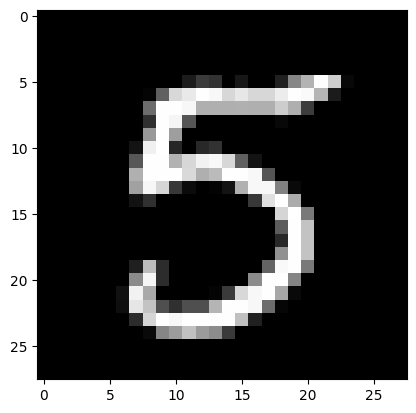

In [5]:
plt.imshow(x_train[0], cmap='gray')
plt.show()

In [6]:
# one-hot-encode y-train
y_train = pd.get_dummies(y_train)

Let's fetch the test set in a similar manner

(9999, 785)


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


28.0


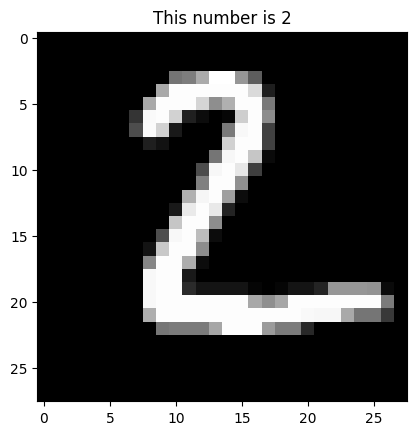

In [7]:
df_test = pd.read_csv("./sample_data/mnist_test.csv")
print(df_test.shape)
display(df_test.head(2))

y_test = df_test['7'].values
df_test.drop(['7'], inplace=True, axis=1)

from math import sqrt
print(sqrt(df_test.shape[-1]))

x_test = df_test.values
n_samples_test = df_test.shape[0]
pixel_val = int(sqrt(df_test.shape[-1]))

x_test = x_test.reshape(n_samples_test, pixel_val, pixel_val)

plt.imshow(x_test[0], cmap='gray')
plt.title(f'This number is {y_test[0]}')
plt.show()

In [8]:
x_train.shape

(19999, 28, 28)

# Create the LeNet5 NN

In [9]:
model = Sequential()

model.add(Conv2D(
    filters=6,
    kernel_size=(5,5),
    strides=(1, 1),
    input_shape=(28, 28, 1)
))

model.add(AveragePooling2D(
    pool_size=2,
    strides=2
))

model.add(Conv2D(
    filters=16,
    kernel_size=(5,5),
    strides=(1, 1)
))

model.add(AveragePooling2D(
    pool_size=2,
    strides=2
))

model.add(Flatten())

model.add(Dense(120, activation="tanh"))
model.add(Dense(84, activation="tanh"))
model.add(Dense(10, activation='softmax'))

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 12, 12, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 4, 4, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 120)               3

# Train LeNet5

In [10]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x=np.expand_dims(x_train, axis=-1),
    y=y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.2
)

Epoch 1/10
250/250 [==============================] - 8s 8ms/step - loss: 0.7156 - accuracy: 0.7900 - val_loss: 0.4640 - val_accuracy: 0.8575
Epoch 2/10
250/250 [==============================] - 1s 6ms/step - loss: 0.4079 - accuracy: 0.8775 - val_loss: 0.3818 - val_accuracy: 0.8792
Epoch 3/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3426 - accuracy: 0.8930 - val_loss: 0.3294 - val_accuracy: 0.9018
Epoch 4/10
250/250 [==============================] - 1s 5ms/step - loss: 0.3007 - accuracy: 0.9064 - val_loss: 0.2907 - val_accuracy: 0.9107
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.2817 - accuracy: 0.9124 - val_loss: 0.3122 - val_accuracy: 0.9053
Epoch 6/10
250/250 [==============================] - 1s 5ms/step - loss: 0.2712 - accuracy: 0.9132 - val_loss: 0.2846 - val_accuracy: 0.9137
Epoch 7/10
250/250 [==============================] - 1s 5ms/step - loss: 0.2717 - accuracy: 0.9142 - val_loss: 0.2864 - val_accuracy: 0.9158
Epoch 

# Observe results

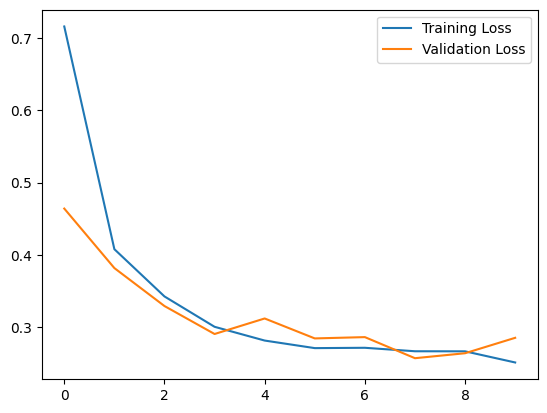

In [11]:
plt.plot(range(len(history.history['loss'])), history.history['loss'], label='Training Loss')
plt.plot(range(len(history.history['loss'])), history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

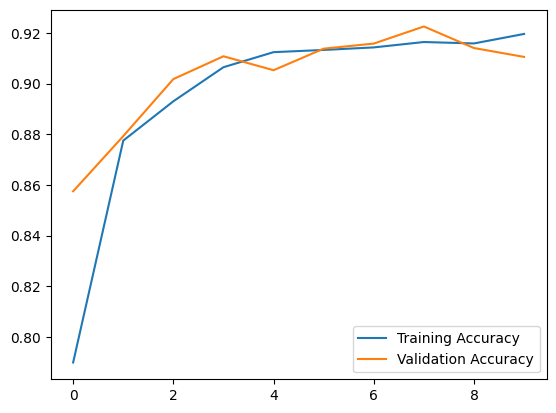

In [12]:
plt.plot(range(len(history.history['accuracy'])), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

# Predictions on test data

In [13]:
from sklearn.metrics import accuracy_score

y_pred_proba_test = model.predict(np.expand_dims(x_test, axis=-1))
y_pred_test = np.argmax(y_pred_proba_test, axis=1)

print(f"Accuracy on unseen test data is {round(100*accuracy_score(y_test, y_pred_test), 1)} %.")

313/313 [==============================] - 1s 2ms/step
Accuracy on unseen test data is 91.2 %.


# Observe output of intermediate layers

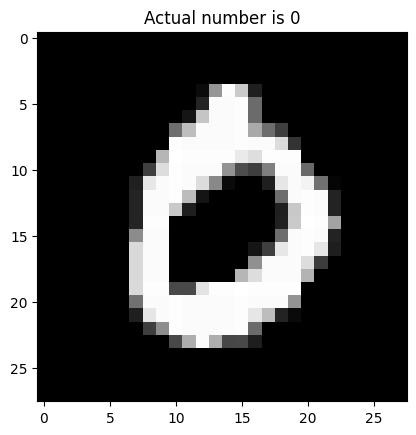

In [47]:
image_1_test = np.expand_dims(x_test[2], axis=-1)
image_1_target = y_test[2]

plt.title(f'Actual number is {image_1_target}')
plt.imshow(image_1_test, cmap='gray')
plt.show()

In [33]:
image_1_test.shape

(28, 28, 1)

## First Conv2D layer

In [48]:
first_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[0].output)
first_layer_output = first_layer_model.predict(np.expand_dims(image_1_test, axis=0))

1/1 [==============================] - 0s 36ms/step


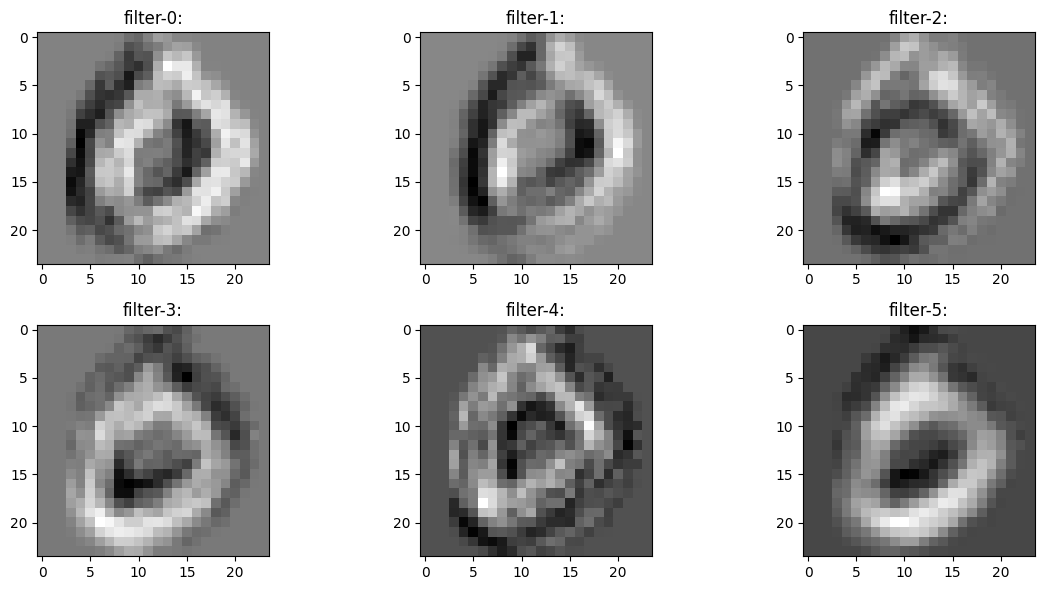

In [49]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for i in range(first_layer_output.shape[-1]):
  ax[int(i/3)][i % 3].set_title(f"filter-{i}:")
  ax[int(i/3)][i % 3].imshow(first_layer_output[0, :, :, i], cmap='gray')
plt.tight_layout()
plt.show()

### Lets look at the filters learned in this step

In [18]:
filters_layer1 = model.layers[0].weights[0].numpy()
print(filters_layer1.shape)

(5, 5, 1, 6)


In [19]:
filters_layer1[:, :, 0, 0]

array([[-0.0213805 , -0.07439538, -0.06519465,  0.11060993, -0.06607169],
       [ 0.07101029,  0.0815585 ,  0.03126967,  0.03540758, -0.10617381],
       [ 0.17204222, -0.08029336,  0.13060597, -0.00278543, -0.11481773],
       [ 0.12084737, -0.04369185, -0.11541664,  0.08930171, -0.11364471],
       [ 0.02486954, -0.03053427,  0.11245088,  0.0242138 , -0.11463739]],
      dtype=float32)

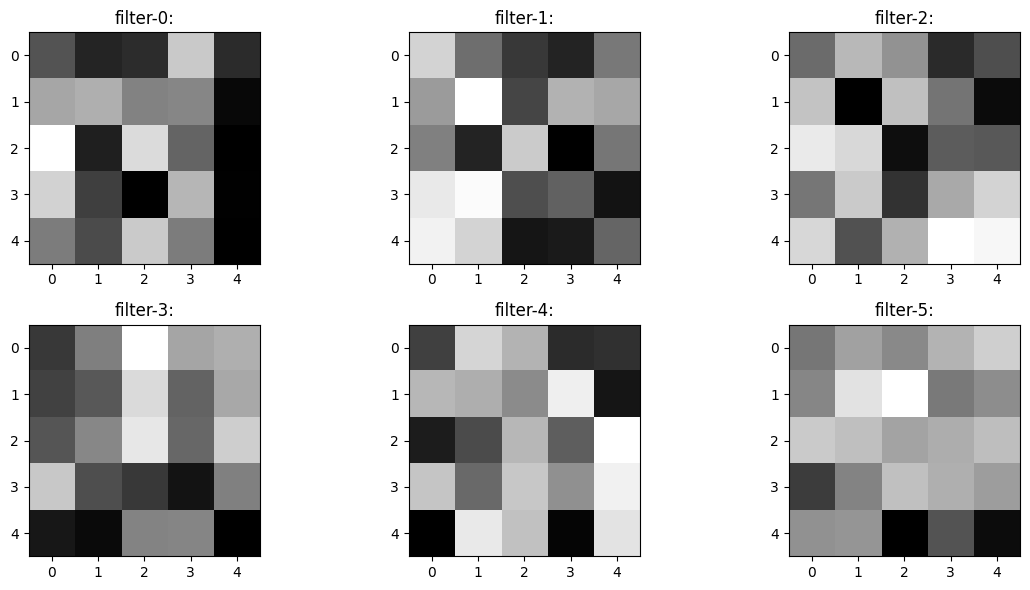

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))
for i in range(first_layer_output.shape[-1]):
  ax[int(i/3)][i % 3].set_title(f"filter-{i}:")
  ax[int(i/3)][i % 3].imshow(filters_layer1[:, :, 0, i], cmap='gray')
plt.tight_layout()
plt.show()

## Second layer of LeNet5

In [50]:
second_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[1].output)
second_layer_output = second_layer_model.predict(np.expand_dims(image_1_test, axis=0))

1/1 [==============================] - 0s 61ms/step


In [51]:
print(second_layer_output.shape)

(1, 12, 12, 6)


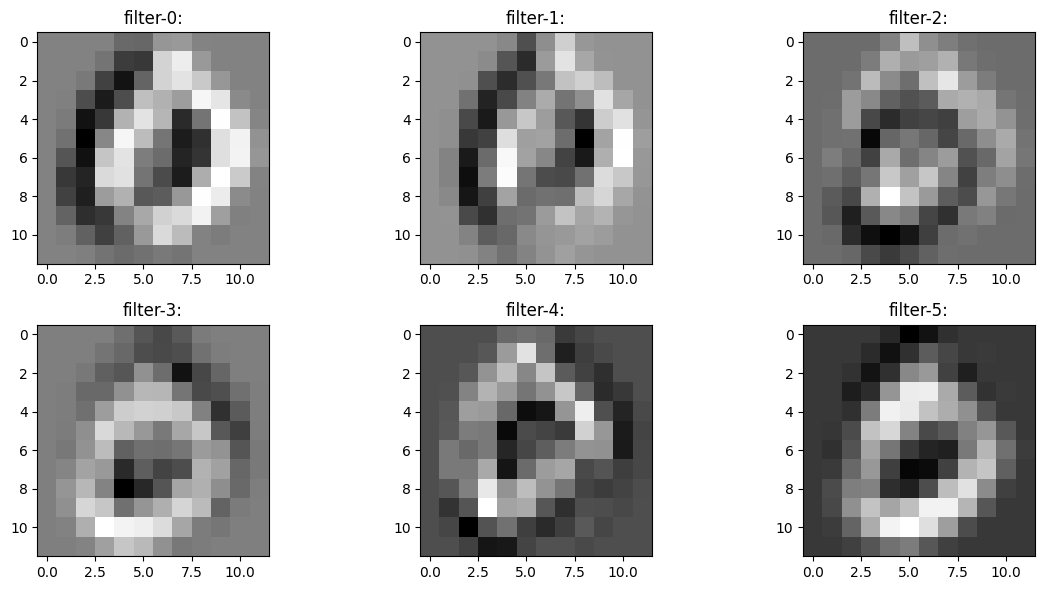

In [52]:
fig, ax = plt.subplots(2, 3, figsize=(12, 6))

for i in range(second_layer_output.shape[-1]):
  ax[int(i/3)][i % 3].set_title(f"filter-{i}:")
  ax[int(i/3)][i % 3].imshow(second_layer_output[0, :, :, i], cmap='gray')
plt.tight_layout()
plt.show()

## Third layer of LeNet5

In [53]:
third_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[2].output)
third_layer_output = third_layer_model.predict(np.expand_dims(image_1_test, axis=0))

1/1 [==============================] - 0s 45ms/step


In [54]:
print(third_layer_output.shape)

(1, 8, 8, 16)


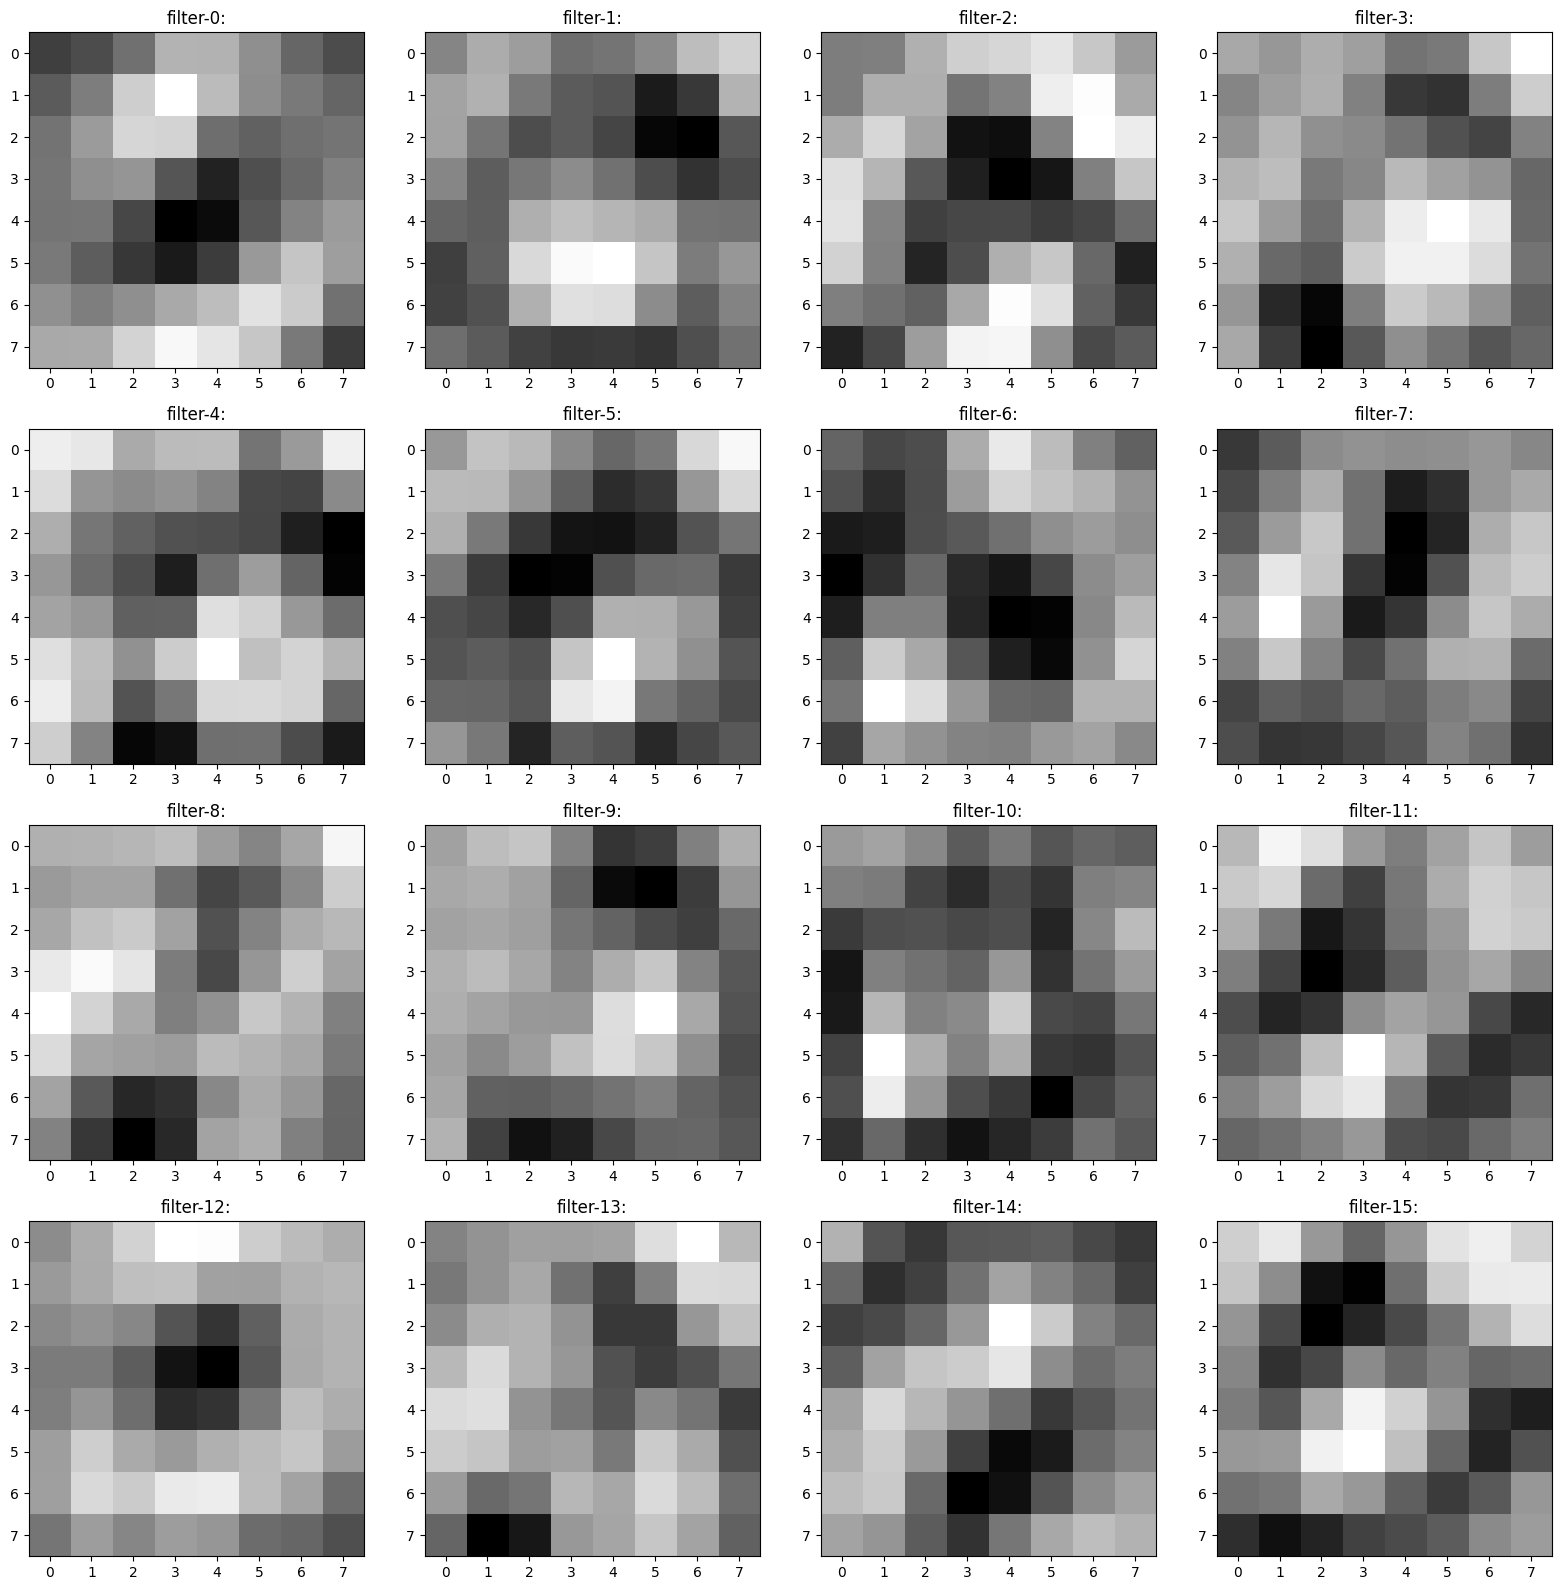

In [55]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))

for i in range(third_layer_output.shape[-1]):
  ax[int(i/4)][i % 4].set_title(f"filter-{i}:")
  ax[int(i/4)][i % 4].imshow(third_layer_output[0, :, :, i], cmap='gray')
plt.tight_layout()
plt.show()

### Lets look at this layer's filters

In [27]:
filters_layer3 = model.layers[2].weights[0].numpy()
print(filters_layer3.shape)

(5, 5, 6, 16)


In [28]:
filters_layer3[:, :, 0, 0]

array([[ 0.10312455,  0.12526415,  0.03389867,  0.05960862,  0.01456139],
       [-0.01758529, -0.0949028 ,  0.01127956,  0.01530462,  0.10477819],
       [-0.11160424, -0.0064282 ,  0.0712087 ,  0.09593126, -0.02153672],
       [ 0.00391858,  0.10686446,  0.09369982,  0.06398953, -0.07265706],
       [ 0.08689986, -0.00913522,  0.03003785,  0.00927759, -0.11452893]],
      dtype=float32)

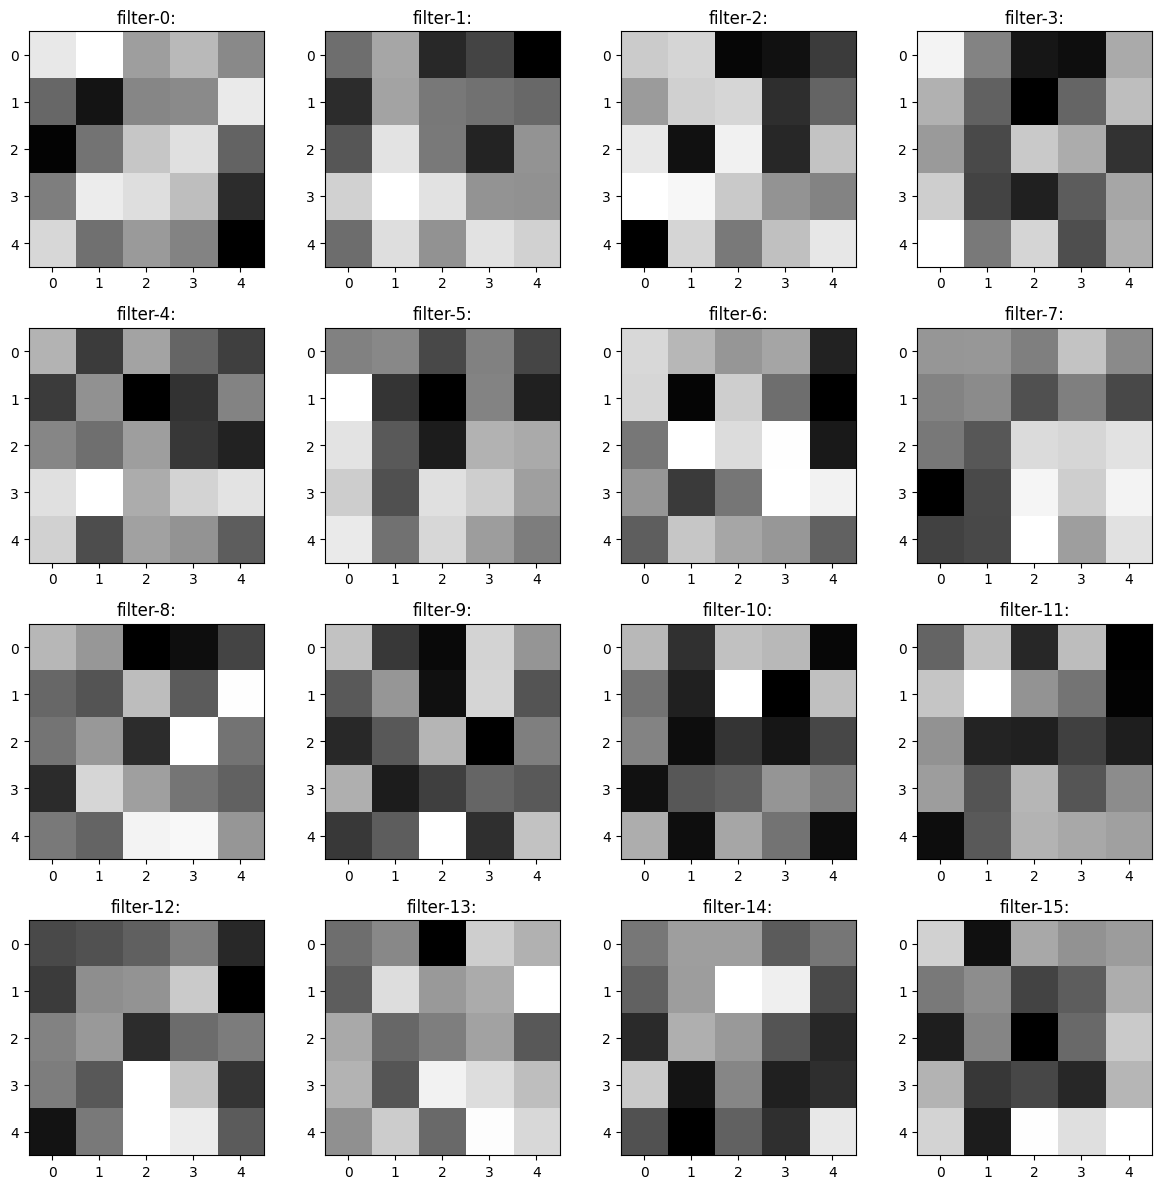

In [31]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))
for i in range(filters_layer3.shape[-1]):
  ax[int(i/4)][i % 4].set_title(f"filter-{i}:")
  ax[int(i/4)][i % 4].imshow(filters_layer3[:, :, 0, i], cmap='gray')
plt.tight_layout()
plt.show()

## Fourth layer of LeNet5

In [56]:
fourth_layer_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
fourth_layer_output = fourth_layer_model.predict(np.expand_dims(image_1_test, axis=0))

1/1 [==============================] - 0s 71ms/step


In [57]:
print(fourth_layer_output.shape)

(1, 4, 4, 16)


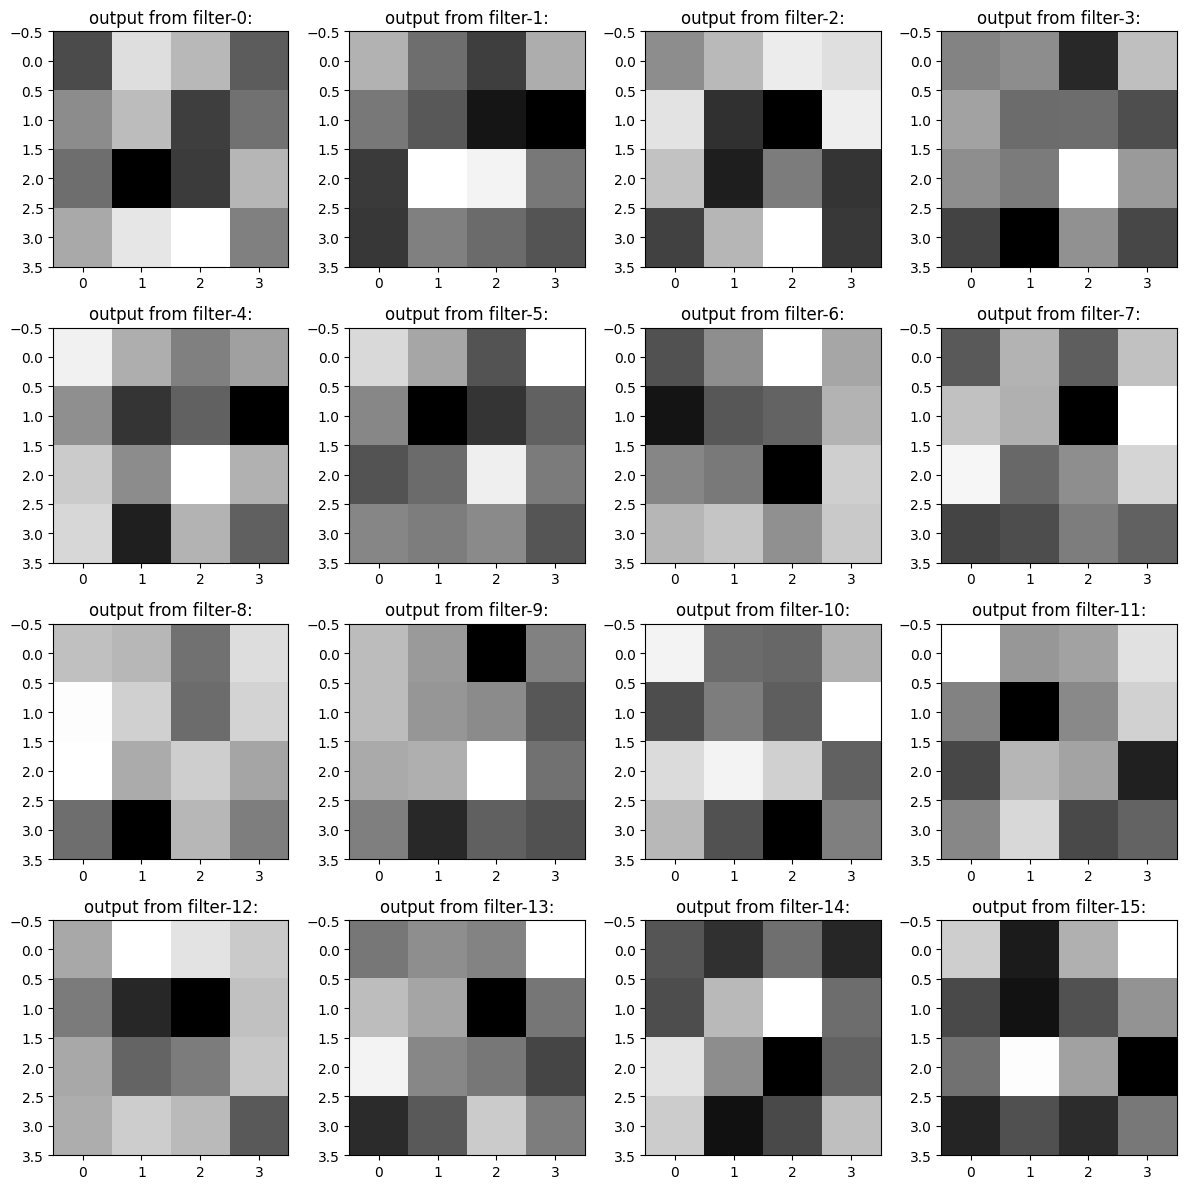

In [58]:
fig, ax = plt.subplots(4, 4, figsize=(12, 12))

for i in range(fourth_layer_output.shape[-1]):
  ax[int(i/4)][i % 4].set_title(f"output from filter-{i}:")
  ax[int(i/4)][i % 4].imshow(fourth_layer_output[0, :, :, i], cmap='gray')
plt.tight_layout()
plt.show()